In [ ]:
### Running in Google Colab? You'll want to uncomment and run these cell once each time you start this notebook.

"""
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/StellarFlares+Exoplanets/flare_simulator.py
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/StellarFlares+Exoplanets/relative_energy_budget.ecsv
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/StellarFlares+Exoplanets/vert_Ocomp.txt
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/StellarFlares+Exoplanets/vert_Tcomp.txt
"""

In [ ]:
"""
%env PYTHONPATH=
"""

In [ ]:
"""
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes
"""

In [ ]:
"""
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))
"""

In [ ]:
"""
!conda install --channel conda-forge pyngl pynio --yes
"""

# Effects of Stellar X-ray and UV Flares on Exoplanetary Atmospheres

Northwestern University CIERA High School Virtual Summer Research Program (Director: Patrick Sheehan)

Project Mentor: Howard Chen (https://sites.northwestern.edu/hwchen/)

Recent studies suggest that many (if not most) of the stars in the Milky Way are orbited by planets. Some fraction of these planets may host living things. Liquid water is believed to be essential for the chemical processes needed for life to arise on a planet. But liquid water only exists in a narrow temperature range: too cold and water freezes, too hot and it boils away. Since the temperature of a planet is determined in large part by its distance from its host star, there's a particular range of distances (the "habitable zone") within which a planet needs to orbit in order for life to have a chance to arise. But there are lots of roadblocks on the path to life, even for planets within the habitable zone. Stars are not simply constant, gentle sources of radiation. Most stars have unstable magnetic fields, and these magnetic fields can produce enormous eruptions, with energies millions of times more powerful than the most powerful hydrogen bomb. The nearest planetary system outside our solar system orbits Proxima Centauri, and one planet, called Proxima Centauri b, is a rocky body like earth that lies in the habitable zone of Proxima Centauri. But, because Proxima Centauri is a particularly unstable type of low-mass star, its habitable zone environment is harsh. 





<img src="firstfig.jpeg">






In general, stellar flares are sudden releases of coronal and/or chromospheric magnetic energy. For the Sun (see image below), flares are closely associated with the ejection of high energy radiation and particles through the Sun's corona into outer space. If the ejection is in the direction of the Earth, particles associated with this disturbance can penetrate into the upper atmosphere (the ionosphere) and cause bright auroras, and may even disrupt long range radio communication. 

For exoplanets, such strong flares could have dramatic consquences on their upper atmospheric climates via X-ray photoionization and UV photochemistry. In this project, we will generate our own stellar flares using a Python toolkit and explore their effects on exoplanetary atmospheres using a 3D climate model.


The project is divided into three primary segments. First, we will review and discuss background science on solar and stellar EUV irradiation and flares. Then, we will use a Python module to generate our own model flares. Lastly, we will apply these flares to a 3D climate model developed by our research groupn and explore the impacts of strong stellar X-ray and UV flares on the atmosphers of rocky exoplanets.

### Solar Flares

Since the development of space-borne satellites, we have detailed observations of solar activty.

<img src="solar_flare.jpg">

Solar flares are most frequent during solar maximum when a lot of sunspots can be observed

<img src="compare.jpg">

The extend of a large flare can be 50 times greater than the size of Earth


<img src="solarflare_deets.jpg">


Flares occur when convenction converts magnetic energy into kinetic energy that is then subsequenly released to space


### Estimating the Energy of an Observed Flare


<img src="arcsec.png">

Examine the above observation of a "blob" of mass eject during a large solar flare eruption.





<img src="arcsec1.jpg">



In the images, the axes are given in arc-seconds. Arc-seconds are a unit of angle. They are a subdivision of degrees. There are 60 arc-seconds in an arc-minute and 60 arc-minutes in a degree. Thus, there are 3,600 arc-seconds in a degree. Imagine a right-triangle with two points on the surface of the Sun and one point on Earth. If the angle between the two lines connecting Earth and the Sun were one arc-second then the distance between the two points on the Sun would be 725 kilometers. So in the images, one arc-second equals 725 kilometers. The center of the coordinate system is the center of the Sun
 


In [ ]:
arcsec = 725 #km
rho = 2e-14 #g/cm3


__EX.1__ Given the above information and assuming that the blob is a sphere and that the typical density of plasma in a coronal loop is 2 x 10^-14 g/cm3, calculate the mass of the observed blob.

 


In [3]:
V = 240 # in km/s or  2.4e5 m/s

v = 240 * 1.0e3

r = 20*arcsec*1000
rho = 2.0e-14 # g/cm^3

import numpy
m = 4./3 * numpy.pi * r**3 * rho


KE = 1/2*m*v**2

print(KE)

7.35554910992654e+18


__EX.2__ Calculate the kinetic energy of the blob in Joules. If a typical burger contains 350 caloris (4000 Joules/Cal), how many burgers would you have to eat to equal the total amount of the energy released during a flare?
 


In [8]:
calories = 4000.
burger = 350*calories

print(KE/burger/1e12)

5.253963649947528


### Observation of Stellar Flares: Case of Proxima Centauri

Proxima Centauri is a small, low-mass star located 4.244 light-years (1.301 pc) away from the Sun in the southern constellation of Centaurus.


<img src="proxcen1.jpg">

Proxima Centauri is a red dwarf star with a mass about an eighth of the Sun's mass (M☉), and average density about 33 times that of the Sun. Although it has a very low average luminosity, Proxima is a flare star that undergoes random dramatic increases in brightness because of magnetic activity. 

<img src="proxcen2.jpg">

 The star's magnetic field is created by convection throughout the stellar body, and the resulting flare activity generates a total X-ray emission similar to that produced by the Sun. The mixing of the fuel at Proxima Centauri's core through convection and its relatively low energy-production rate mean that it will be a main-sequence star for another four trillion years.
 
 
 
 
<img src="proxcen3.jpg">
 
 
 
 
 
 Food for thought: the star is orbiting by a planet (https://en.wikipedia.org/wiki/Proxima_Centauri_b). What kind of hazard do you think these "superflares" could have on the planet's atmospheres and perhaps biosphere?
 
 


One effect is heating the atmosphere, which might cause atmospheric escape.
 
<img src="escape1.png">

An atmosphere with high pressure and temperature can also undergo hydrodynamic escape. In this case, a large amount of thermal energy, usually through extreme ultraviolet radiation, is absorbed by the atmosphere. As molecules are heated, they expand upwards and are further accelerated until they reach escape velocity. In this process, lighter molecules can drag heavier molecules with them through collisions as a larger quantity of gas escapes. Hydrodynamic escape has been observed for exoplanets close to their host star, including the hot Jupiter HD 209458b.



### Previous work on Modelng Effects of Flares on Prox Cen b



 
<img src="tilley1.jpeg">

 O3 evolution driven by repeated proton events, 100 flare events for all cases. Top: 10^30 erg flares+protons. The 1 per day period is likely to occur for a planet orbiting GJ1243; the dash-dotted blue line extrapolates the predicted O3 loss rate. Middle: Carrington equivalent proton events at 10^31.9 erg. The dash-dotted red line predicts O3 evolution for the most likely frequency experienced at a GJ1243-orbiting planet. Bottom: AD Leo equivalent proton events with 10^34 erg.




### Modeling Stellar Flares



Now that we have understood a bit about stellar flares, we can try to compute our own and simulate the effects of these highly energetic flares on the atmospheres of habitable worlds. 

This Python module included here (the author is our collaborator: https://github.com/parkus/fiducial_flare) takes advantage of data taken by the Hubble Space Telescope (https://archive.stsci.edu/prepds/muscles/) and is a package for generating a reasonable approximation of the UV emission of M dwarf stars over a single flare or a series of them. The simulated radiation is resolved in both wavelength and time. The intent is to provide consistent input for applications requiring time-dependent stellar UV radiation fields that balances simplicity with realism, namely for simulations of exoplanet atmospheres.


Below are some introductory examples of what we can do with this code:




0.1 erg / (cm2 s)


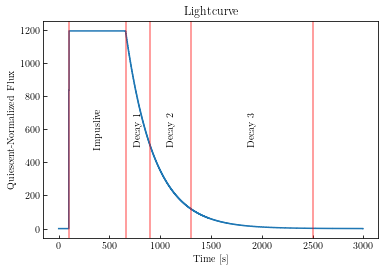

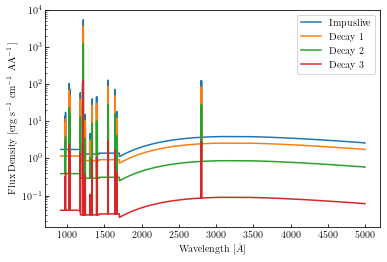

In [1]:
import numpy as np
import csv
from astropy import units as u
from matplotlib import pyplot as plt
plt.ion()
import flare_simulator as flaresim


# Let's look at a flare with an equivalent duration of 1 Ms occuring 100 s after the start of observations
eqd = 1*u.Ms
t0 = 100.*u.s

# first, a look at a well-resolved lightcurve
tbins_lc = np.linspace(0, 3000., 1000)*u.s
y = flaresim.flare_lightcurve(tbins_lc, t0, eqd)
plt.figure()
plt.step(tbins_lc[:-1], y, where='post')
plt.xlabel('Time [s]')
plt.ylabel('Quiescent-Normalized Flux')
plt.title('Lightcurve')

# let's get a spectrum from the impulsive phase and a few integrating
# intervals of the decay phase
tbins_spectra = [100., 660., 900., 1300., 2500.]*u.s
names = ['Impuslive', 'Decay 1', 'Decay 2', 'Decay 3']

# show these on the lightcurve plot
[plt.axvline(t.value, color='r', alpha=0.5) for t in tbins_spectra]
tmids = (tbins_spectra[:-1] + tbins_spectra[1:])/2
for tmid, name in zip(tmids, names):
    plt.annotate(name, xy=(tmid.value, 0.5), xycoords=('data', 'axes fraction'),
                 ha='center', va='center', rotation='vertical')

# now let's get some spectra
wbins = np.arange(912, 5000., 1.) * u.AA
spectra = flaresim.flare_spectra(wbins, tbins_spectra, t0, eqd)

# and plot them
plt.figure()
for spectrum in spectra:
    plt.step(wbins[:-1], spectrum, where='post')
plt.yscale('log')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux Density [erg s$^{-1}$ cm$^{-1}$ AA$^{-1}$]')
plt.legend(names)

# Aside: An important parameter is the quiescent Si IV flux, as this determines
# the absolute fluxes of the flare. A default value (based on an Earth-equivalent
# instellation from GJ 832) is supplied. That value is
print(flaresim.flare_defaults['SiIV_quiescent'])
# but for now we've just used the default.

    Start Time     Equivalent Duration
        s                   s         
------------------ -------------------
 4301.149905618268  1120.7800398582021
  5244.60842807774   615.3102015088283
 10075.11449410302   463.7341791726883
10102.052038934167   190.0703652853275
 14147.33437862805  260.88107014513116
15732.023212499673  2199.6155005039977
 17346.67251002591  328.17031691939934
 20969.14028930871   608.8390494713304
21451.333051922735  100.01074167619353
21968.874313173303   939.6772898326485
               ...                 ...
 83491.14364687458  127.46113407850478
  84767.0762691051  110.41194697063104
  87279.6604294474   116.0361112285838
 91772.03500392124    4220.28776686227
 92212.04255626645  478.67377266955657
 96767.65172906728   700.3839851370307
 97892.25878681839  165.64684073755615
 98299.83812125774   252.7328406096473
 99445.64070028478  242.97351470115208
  99595.6867995551   8215.029817085984
Length = 44 rows


Text(0, 0.5, 'Quiescent-Normalized Flux')

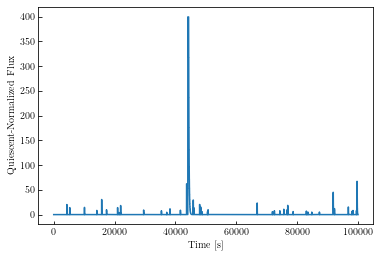

In [2]:
import numpy as np
import csv
from astropy import units as u
from matplotlib import pyplot as plt
plt.ion()
import flare_simulator as flaresim


# --------
# generate a random series of flares from the default FFD and plot the lightcurve for them
time_span = 1e5*u.s
tbins = np.arange(0, time_span.value, 10.) # astropy quantities don't work here
tbins = tbins*u.s
y, flares = flaresim.flare_series_lightcurve(tbins, return_flares=True)

# first, let's have a look at what flares we drew
t_flare, eqds = flares
from astropy import table
flare_tbl = table.Table((t_flare, eqds), names=('Start Time', 'Equivalent Duration'))
print(flare_tbl)

# now what does the lightcurve of these events look like?
plt.figure()
plt.step(tbins[:-1], y, where='post')
plt.xlabel('Time [s]')
plt.ylabel('Quiescent-Normalized Flux')
# --------




dict_keys(['eqd_min', 'eqd_max', 'ks_rate', 'cumulative_index', 'boxcar_height_function', 'decay_boxcar_ratio', 'BB_SiIV_Eratio', 'T_BB', 'clip_BB', 'SiIV_quiescent', 'SiIV_normed_flare_spec'])


Text(0, 0.5, 'Normalized Spectral Energy Density [$\\AA^{-1}$]')

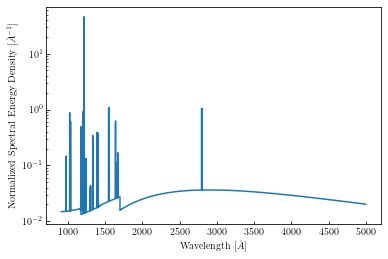

In [3]:
import numpy as np
import csv
from astropy import units as u
from matplotlib import pyplot as plt
plt.ion()
import flare_simulator as flaresim

# --------
# modify the standard flare to have a blackbody of 10,000 K instead of a 9,000 K
# (but the same ratio of blackbody to Si IV energy)

# let's start with the default flare parameters
flare_params = flaresim.flare_defaults.copy()

# what can we play with?
print(flare_params.keys())

# change the BB temperature to 10,000 K
flare_params['T_BB'] = 1e4 * u.K

# we should also turn off the default clipping of the blackbody
# in the FUV and shortward since it will contribute significantly
# more flux there than is presumed to be included in the fiducial
# flare energy budget
flare_params['clip_BB'] = False

# let's see what the revised spectral energy budget looks like
wbins = np.arange(912, 5000., 1.) * u.AA
si4_fluence = 1.0

## we could supply our custom flare_params dictionary
e = flaresim.flare_spectrum(wbins, si4_fluence, **flare_params)
## - or - we could specify a blackbody temperature and turn off
## clipping as keywords
e = flaresim.flare_spectrum(wbins, si4_fluence, T_BB=1e4*u.K, clip_BB=False)

plt.figure()
plt.step(wbins[:-1], e, where='post')
plt.yscale('log')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Normalized Spectral Energy Density [$\AA^{-1}$]')
# --------





In the next section, we will use the outputs from this code to simulate the effects of a single and repeated flares on rocky exoplanet atmospheres.

To better use this code to generate inputs for our 3D climate/atmosphere model, we should convert the y-axis to equilvalent durations. The equivalent duration is basically a measure of the flare ergy, It is mathematically expresed as:

#### $\delta_E = \int{\frac{F_f - F_q}{F_q}dt}$

where $F_f$ is the flare flux, $F_q$ is the quiescent flux, and $dt$ is the flare duration.

Try to:

__EX.3__ Generate your own unique flare by changing the parameters within _flare_params.keys()_. If you can, try to make it a large flare, perhaps as least as strong as the Great AD Leonis flare (so that it has a greater effect on the atmosphere; http://adsabs.harvard.edu/full/1991ApJ...378..725H) Send the results to howard@earth.northwestern.edu


Text(0.5, 1.0, 'Lightcurve')

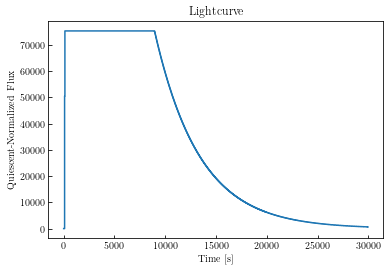

In [8]:
#### For EX. 3

# Let's look at a flare with an equivalent duration of 1 Ms occuring 100 s after the start of observations
eqd = 1000*u.Ms
t0 = 100.*u.s

# first, a look at a well-resolved lightcurve
tbins_lc = np.linspace(0, 30000., 1000)*u.s
y = flaresim.flare_lightcurve(tbins_lc, t0, eqd)
plt.figure()
plt.step(tbins_lc[:-1], y, where='post')
plt.xlabel('Time [s]')
plt.ylabel('Quiescent-Normalized Flux')
plt.title('Lightcurve')

__EX.4__ Generate a series of strong flares and send the results to the above email address. (_hint_ try changing the following parameters in flare_simulator.py: eqd_min, eqd_max, ks_rate, cumulative_index. I can explain what each of them mean.)

Text(0, 0.5, 'Quiescent-Normalized Flux')

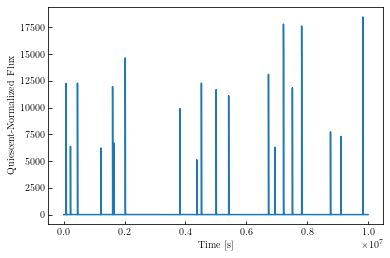

In [37]:
#### For EX. 4

# flare parameters
flare_params = flaresim.flare_defaults.copy()

flare_params["eqd_min"] = 10*u.Ms
flare_params["eqd_max"] = 100*u.Ms
flare_params["ks_rate"] = 3.0*1./u.d
flare_params["cumulative_index"] = 0.05

# generate a random series of flares from the default FFD and plot the lightcurve for them
time_span = 1e7*u.s
tbins = np.arange(0, time_span.value, 10.) # astropy quantities don't work here
tbins = tbins*u.s
y, flares = flaresim.flare_series_lightcurve(tbins, return_flares=True, **flare_params)

# now what does the lightcurve of these events look like?
plt.figure()
plt.step(tbins[:-1], y, where='post')
plt.xlabel('Time [s]')
plt.ylabel('Quiescent-Normalized Flux')
# --------

### Atmospheric Effects of Stellar Flares I: Ozone Introduction

In terms of exoplanet habitability, ozone plays a key role. This is due to its ability to absorb/scatter UV radiation. 


For nearly a billion years, ozone molecules in Earth's atmosphere have protected life from the effects of ultraviolet rays. The ozone layer resides in the stratosphere and surrounds the entire Earth. UV-B radiation (280- to 315- nanometer (nm) wavelength) from the Sun is partially absorbed in this layer. Ozone is produced in the stratosphere (10-50 km altitude) by photolysis of O2 and subsequent combination of O atoms with O2. The stratospheric O3 layer protects life on Earth by absorbing solar UV radiation and preventing this radiation from reaching the Earth's surface. Fortunately, the O3 layer is not in contact with the Earth's surface; inhalation of O3 is toxic to humans and plants.


<img src="ozone1.jpg">



<img src="ozone2.jpg">

^X-axis = 10^12 molecules / cm^3, for the ozone concentration


Only 10 or less of every million molecules of air are ozone. The majority of these ozone molecules resides in a layer between 10 and 40 kilometers (6 and 25 miles) above the Earth's surface in  the stratosphere.



In [ ]:
Av=  6.02e23  
P = 3500 #pa
R =  8.31 #universal gas constant
Ta = 220 #K atmospheric temp




__EX.5__   Calculate the mixing ratio of O3 at the peak of the O3 layer (z = 25 km; P = 35 hPa; T = 220 K).EPA standard of air quality states that inhaling above 100 ppbv of O3 would be detrimental to human health. Compare this value with what you calculated.


In [ ]:
N_col = 7.5e22 #moleculars /m^2
P_surface   = 10135 #Pa
Ts = 273 #K surface temp


In [ ]:
### Is there an equation for this?



__EX.6__   To illustrate how thin this stratospheric O3 layer actually is, imagine that all of the O3 in the atmospheric column were brought to sea level as a layer of pure O3 gas under standard conditions of temperature and pressure (1.013x105 Pa, 273 K). Calculate the thickness of this layer.

### Atmospheric Effects of Stellar Flares II: 3D Atmosphere Simulations (*using my flares*)



<img src="flare1.jpg">


How might a star's large flares affect an exoplanet orbiting it? 
Here, we will compare simulations of an Earth-like planet around a Sun-like star with a rocky exoplanet around Proxima Centauri. The main difference between these two simulations are the 1) incident EUV and X-ray flux  and 2) distance from the host star. Other differences arising from self-consistent assumptions are things like the planetary rotation period, but they are unlikely to influence the results significantly. Hence, comparing the results between these two sims might give us insights as to how different EUV emission and stellar flares could affect exoplanetary atmospheres. 
 
 
First, download the data in the directory: vert_Tcomp.txt and vert_Ocomp.txt. vert_Tcomp.txt contains data for the temperature of two exoplanets, vert_Ocomp.txt contains data for the atomic oxygen concetration of two exoplanets.

There are three columns in each data set. The first one is the pressure (can be converted to altitude). The second and third column belong to two exoplanets; one planet each.

Try to plot the pressure (or altitude) as the y-axis and the temperature/oxygen values as the x-axis. Something like this:

<img src="temp_planets.png">

__EX. 7__   Which temperature profile belongs to an exoplanet that has experience stellar flares? Why?

(66, 3)


Text(0, 0.5, 'Pressure')

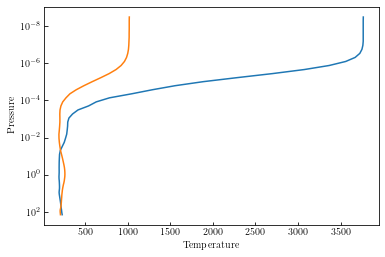

In [14]:
import numpy
import matplotlib.pyplot as plt

data = numpy.loadtxt("vert_Tcomp.txt", max_rows=66)
print(data.shape)

pressure = data[:,0]
temperature_planet1 = data[:,1]
temperature_planet2 = data[:,2]

plt.plot(temperature_planet1, pressure, "-")
plt.plot(temperature_planet2, pressure, "-")

plt.yscale('log')

plt.gca().invert_yaxis()

plt.xlabel("Temperature")
plt.ylabel("Pressure")

__EX. 8__   Which atomic oxygen profile belongs to an exoplanet that did not experience flares? Why?

(66, 3)


Text(0, 0.5, 'Pressure')

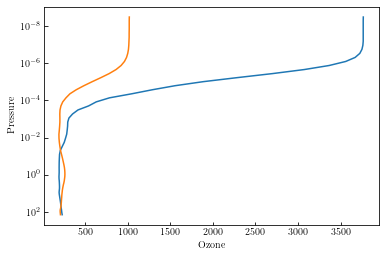

In [15]:
import numpy

ozone = numpy.loadtxt("vert_Ocomp.txt", max_rows=66)
print(ozone.shape)

pressure = data[:,0]
ozone_planet1 = data[:,1]
ozone_planet2 = data[:,2]

plt.plot(ozone_planet1, pressure, "-")
plt.plot(ozone_planet2, pressure, "-")

plt.yscale('log')

plt.gca().invert_yaxis()

plt.xlabel("Ozone")
plt.ylabel("Pressure")

### Atmospheric Effects of Stellar Flares II: 3D Atmosphere Simulations (*using your own flares*)



<img src="flare1.jpg">


How might a star's large flares affect an exoplanet orbiting it? 
Here, we will compare simulations of an Earth-like planet around a Sun-like star with a rocky exoplanet around Proxima Centauri. The main difference between these two simulations are the 1) incident EUV and X-ray flux  and 2) distance from the host star. Other differences arising from self-consistent assumptions are things like the planetary rotation period, but they are unlikely to influence the results significantly. Hence, comparing the results between these two sims might give us insights as to how different EUV emission and stellar flares could affect exoplanetary atmospheres. 
 
 
First, download the data here. Then, we will use PyNGL (a Python toolkit designed to visualize 3D atmospheric data; official site is https://www.pyngl.ucar.edu/index.shtml).


If you're interested, take a look at the paper series I've published the models in (our 2018 paper (https://iopscience.iop.org/article/10.3847/2041-8213/aaedb2/meta) and our 2019 paper (https://arxiv.org/pdf/1907.10048.pdf)).


 
_Note_: This is an ongoing project and is designed to be very open ended. I have done limited work here so if you get any interesting results, please don't share them with others. Let me know and we can discuss them. 
 
X-ray and EUV flux can impart substantial heat and energize the upper atmosphere. 

__EX. 7__   Explore the effects of stellar flares on a) atmospheric temperature, b) ozone, and c) ionized atomic oxygen


We will guide you through one possibility below.


Spend some time looking over the examples, I recommend looking at this link: https://www.pyngl.ucar.edu/Tutorial/. Think of ways you might 


Discussion: What might your results imply for observations by upcoming space-borne mission such as the _James Webb Space Telescope_?

See below for an example of what we might "see"


<img src="trappist-1_e.png">




### Bonus Research Project: The Key Role of Clouds on the Habitability of Rocky Exoplanets  


From an exoplanet habitability standpoint, clouds are important as they regulate the radiative balance of the atmosphere. 

<img src="clouds1.jpg">



From an observational standpoint, clouds are important because their presence block out/mute signals of atmospheric molecules.  

<img src="clouds2.jpg">



However, based on observations of exoplanetary atmospheres, they seem to be ubiquitous (see this paper and this paper). Here we will explore how clouds can affect the climate of rocky exoplanets orbiting M-dwarf stars.
 
 
<img src="tlplanet.jpg">

 
 Download this model dataset.
 
 
 Some research questions (use earlier tools to answer them, this is open ended)
 
__EX.8__  Why do the slowly-rotating planet have lower surface temperatures (hint: https://scijinks.gov/coriolis/)?

__EX.9__  What some other differences between these two exoplanet simulations? Are they caused by clouds or something else?

## Note: I hope you have learned something fascinating about habitable worlds in this brief project. Feel free reach out to me (and Patrick) if you would like to get more involved with this ongoing research project. We'd be happy to have you on the team if you'd like to help out beyond what is presented here! 

Sincerely,

Howard Chen 
